# Introduction to Neural Networks
Guided by Linkedin Learning Course by Jonathan Fernandes

## Import packages

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [4]:
#confirming the image is 28 by 28
X_train[0].shape

(28, 28)

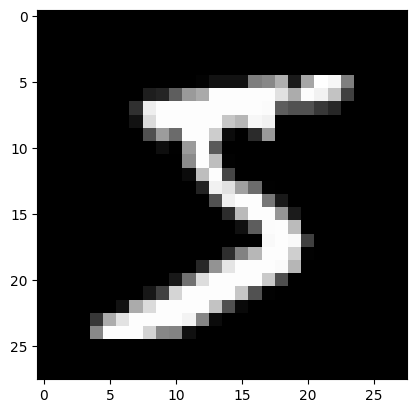

In [5]:
#examining the first digit
plt.imshow(X_train[0],
           cmap='gray')
plt.show()

In [6]:
#confirms that our corresponding training result is a 5
y_train[0]
#checks out

5

## Preprocessing the image data

In [7]:
image_height, image_width = 28,28

In [8]:
# to use this in our neural network we want to have a single line that is 784 across (because 28x28=784)
# gives us one layer with 784 neurons across
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
# We want to rescale our data from 0 to 1 (currently it's between 0 and 255)
# if we convert to float first there will be no surprises when we scale
print(X_train[0])
X_train = X_train.astype('float')
X_test = X_test.astype('float')


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [10]:
X_train /= 255.0
X_test /= 255.0

In [11]:
# now we can see that they're all between 0 and 1
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [12]:
# We have just reshaped our data to be a single layer with 784 nodes
# Our OUTPUT is going to be ten different classes one for each digit
# let's check out our output
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [13]:
# now we can see that we've one from a one dimensional array to one with ten separate bins or classes
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

In [14]:
model = Sequential()

In [15]:
model.add(Dense(512, activation='relu',input_shape=(784,)))
model.add(Dense(512, activation='relu')) # we don't need to specify the input now
model.add(Dense(10, activation='softmax'))

## Compile the model

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# How do we get the above Param # (number of parameters)?
# originally 784 inputs
# terminating into 512 nodes
# include a bias
print('First Layer:', (784*512)+512)
print('Second Layer:', (512*512)+512)
print('Output Layer:', (512*10)+10)

First Layer: 401920
Second Layer: 262656
Output Layer: 5130


## Train the model

In [19]:
#early_stopping rounds stops the training early if the validation accuracy doesn't improve for 3 consecutive epochs
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience = 5)
history = model.fit(X_train,
                    y_train,
                    epochs=25,
                    callbacks=[early_stopping],
                    validation_data=(X_test,y_test))

Epoch 1/25
1875/1875 [==============================] - 33s 16ms/step - loss: 0.1854 - accuracy: 0.9425 - val_loss: 0.1018 - val_accuracy: 0.9695
Epoch 2/25
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0797 - accuracy: 0.9751 - val_loss: 0.0912 - val_accuracy: 0.9726
Epoch 3/25
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0554 - accuracy: 0.9827 - val_loss: 0.0870 - val_accuracy: 0.9761
Epoch 4/25
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0436 - accuracy: 0.9864 - val_loss: 0.0708 - val_accuracy: 0.9803
Epoch 5/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.0777 - val_accuracy: 0.9798
Epoch 6/25
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0277 - accuracy: 0.9908 - val_loss: 0.0828 - val_accuracy: 0.9804
Epoch 7/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0800 -

## What is the accuracy of the model?

### Plot the accuracy of the training model

Text(0, 0.5, 'Model Accuracy')

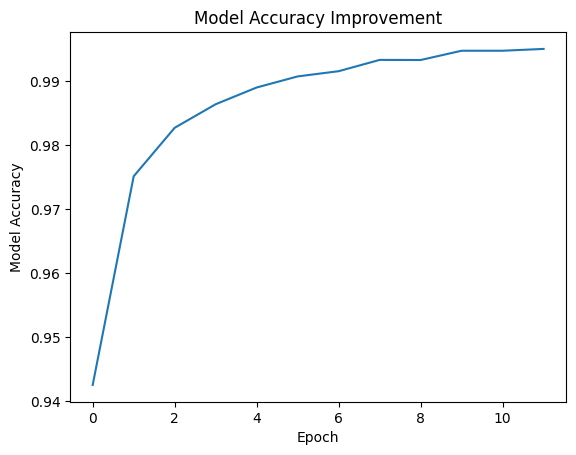

In [20]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy Improvement')
plt.xlabel('Epoch')
plt.ylabel('Model Accuracy')

### Plot the accuracy of training and validation set

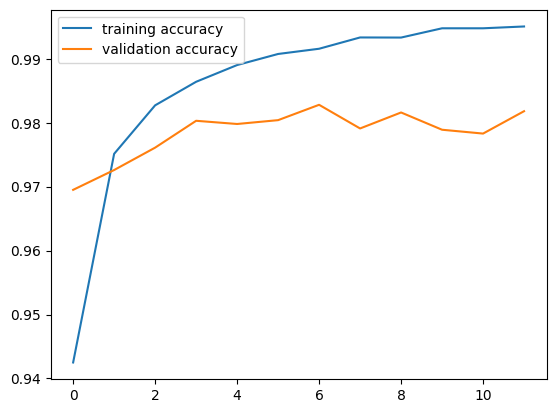

In [21]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()

### Accuracy of training and validation with loss

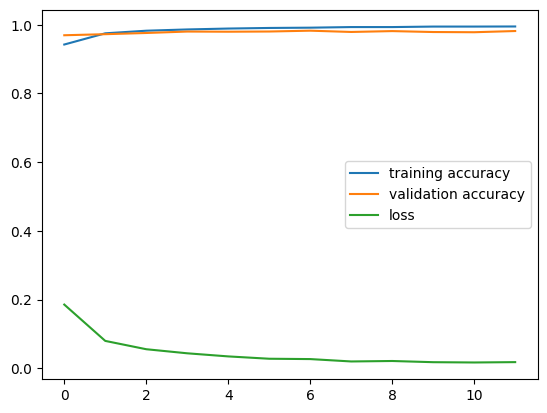

In [22]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.plot(history.history['loss'], label='loss')
plt.legend()

In [29]:
# Evaluating the model
score = model.evaluate(X_test, y_test)
print(score)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 28, 28, 1)


## Run a prediction

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons.
- What results do you get when trying to use another activation function?
- Try a new dataset with your own neural network and see what accuracy you get.

# Convolution Neural Network

## Import the libraries

In [24]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [25]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing

In [27]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

batch_size = 128
num_classes = 10
epochs = 3

NameError: name 'num_classes' is not defined

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Use the model

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

In [ ]:
history_cnn = cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_train,y_train))

Recall that when using neural networks we got good accuracy.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

Comparing this to using CNNs - the performance is far superior.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])

## Not related just testing out files

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data/olympics.csv',skiprows=4)
df.head()